<a href="https://colab.research.google.com/github/tmtong/ai-library-exploration/blob/main/mlbox_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/fastai/fastai.git


  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-42p8e3th
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-42p8e3th
     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for fastai: filename=fastai-2.4.1-cp37-none-any.whl size=188188 sha256=e40d72c03587fa8b980b9f18c790342506c55e0deb894c18ed15151c2803066b
  Stored in directory: /tmp/pip-ephem-wheel-cache-fhd_jim5/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
 !pip install mlbox

In [6]:
!pip install git+https://github.com/fastai/fastai.git
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
data_path = '/root/.fastai/data/adult_sample/adult.csv'
paths = [data_path] #to modify
target_name = "salary" #to modify
data = Reader(sep=",").train_test_split(paths, target_name)  #reading
data = Drift_thresholder().fit_transform(data)  #deleting non-stable variables

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-04ilh9ya
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-04ilh9ya
  Created wheel for fastai: filename=fastai-2.4.1-cp37-none-any.whl size=188188 sha256=3687c16c79407ac0978e20a62e98c6703dbe2c1ee36cd09f10458613548c0ea6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5lu2ig3m/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai



reading csv : adult.csv ...
cleaning data ...
CPU time: 4.834441184997559 seconds

You have no test dataset !

> Number of common features : 14

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 8
> Number of numerical features: 6
> Number of training samples : 32540
> Number of test samples : 0

> Top sparse features (% missing values on train set):
occupation       1.6
education-num    1.5
dtype: float64

> Task : classification
<50k     24701
>=50k     7839
Name: salary, dtype: int64

encoding target ...

You have no test dataset...


In [14]:
opt = Optimiser()

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [15]:
Optimiser().evaluate(None, data)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : neg_log_loss = -0.2880682040042626
VARIANCE : 0.0036415354924750065 (fold 1 = -0.28442666851178755, fold 2 = -0.29170973949673756)
CPU time: 3.512822389602661 seconds



-0.2880682040042626

In [16]:
space = {

        'ne__numerical_strategy' : {"space" : [0, 'mean']},

        'ce__strategy' : {"space" : ["label_encoding", "random_projection", "entity_embedding"]},

        'fs__strategy' : {"space" : ["variance", "rf_feature_importance"]},
        'fs__threshold': {"search" : "choice", "space" : [0.1, 0.2, 0.3]},

        'est__strategy' : {"space" : ["LightGBM"]},
        'est__max_depth' : {"search" : "choice", "space" : [5,6]},
        'est__subsample' : {"search" : "uniform", "space" : [0.6,0.9]}

        }

best = opt.optimise(space, data, max_evals = 5)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.3}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'subsample': 0.7104076877139489, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : neg_log_loss = -0.3382878587486122
VARIANCE : 0.001458106892452099 (fold 1 = -0.33682975185616015, fold 2 = -0.33974596564106435)
CPU time: 3.315

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])



MEAN SCORE : neg_log_loss = -0.2845650759783326
VARIANCE : 0.003592959703563686 (fold 1 = -0.28097211627476887, fold 2 = -0.28815803568189624)
CPU time: 36.48231816291809 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.3}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'subsample': 0.6904651083623674, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])



MEAN SCORE : neg_log_loss = -0.28340166681353074
VARIANCE : 0.0035570858548371336 (fold 1 = -0.27984458095869363, fold 2 = -0.2869587526683679)
CPU time: 12.746681928634644 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.2}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'subsample': 0.6222404628769318, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nth

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])



MEAN SCORE : neg_log_loss = -0.2817777726013707
VARIANCE : 0.0030283006329343276 (fold 1 = -0.27874947196843636, fold 2 = -0.284806073234305)
CPU time: 9.902539491653442 seconds
100%|██████████| 5/5 [01:08<00:00, 13.78s/trial, best loss: 0.2817777726013707]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'random_projection', 'est__max_depth': 5, 'est__strategy': 'LightGBM', 'est__subsample': 0.8768745729512117, 'fs__strategy': 'rf_feature_importance', 'fs__threshold': 0.1, 'ne__numerical_strategy': 'mean'}



fitting the pipeline ...


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


CPU time: 10.388745546340942 seconds


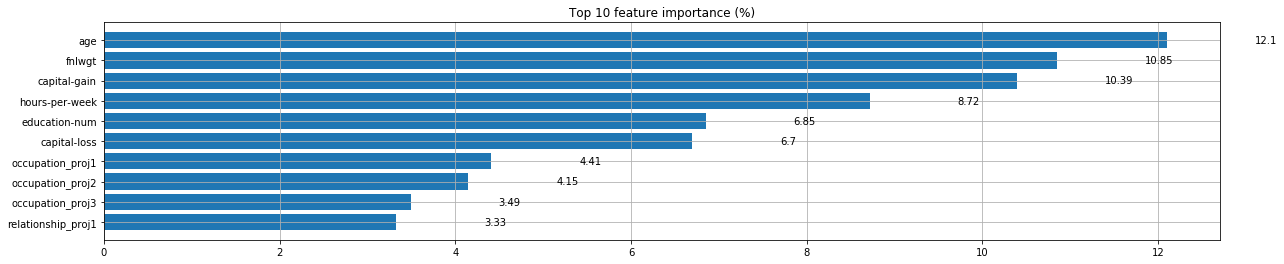


> Feature importances dumped into directory : save


/usr/local/lib/python3.7/dist-packages/mlbox/prediction/predictor.py:405: UserWarning: You have no test dataset. Cannot predict !
  warnings.warn("You have no test dataset. Cannot predict !")


In [17]:
Predictor().fit_predict(best, data)